In [67]:
import pickle
import random
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression


# Function to generate random patterns and labels
def generate_random_data(num_samples, num_features):
    # X = np.random.randint(0, 2, (num_samples, num_features))  # Random binary patterns
    X = np.random.rand(num_samples, num_features)
    y = np.random.choice([-1, 1], num_samples)  # Random binary labels (-1 or 1)
    return X, y


# Perceptron model
class Perceptron:
    def __init__(self, num_features, learning_rate=0.001, max_epochs=1000):
        self.weights = np.zeros(num_features)
        self.bias = 0
        self.learning_rate = learning_rate
        self.max_epochs = num_features * 30  # max_epochs

    def predict(self, x):
        return 1 if np.dot(x, self.weights) + self.bias >= 0 else -1

    def fit(self, X, y):
        for epoch in range(self.max_epochs):
            errors = 0
            for xi, target in zip(X, y):
                prediction = self.predict(xi)
                if target != prediction:
                    self.weights += self.learning_rate * xi * target
                    # sign constrained
                    self.weights[self.weights < 0] = 0
                    self.bias += self.learning_rate * target
                    errors += 1
            # Stop if no errors in epoch (converged)
            if errors == 0:
                # print(f"Converged after {epoch + 1} epochs")
                break
        else:
            # print("Reached maximum epochs without full convergence")
            pass

    def score(self, X, y):
        predictions = [self.predict(xi) for xi in X]
        accuracy = np.mean(predictions == y)
        return accuracy


# Parameters
num_samples = 10  # Number of random patternss
num_features = 10  # Number of features per pattern

# Generate random data
X, y = generate_random_data(num_samples, num_features)

# Initialize Perceptron and train
perceptron = Perceptron(num_features=num_features, learning_rate=0.1, max_epochs=100)
perceptron.fit(X, y)

# Evaluate performance
accuracy = perceptron.score(X, y)
print(f"Accuracy on random data: {accuracy * 100:.2f}%")


Accuracy on random data: 90.00%


In [68]:
class TrainPerceptron:
    def __init__(self, num_samples, num_features):
        self.num_samples = num_samples
        self.num_features = num_features
        self.perceptron = Perceptron(
            num_features=num_features, learning_rate=0.1, max_epochs=100
        )

    def train(self):
        X, y = generate_random_data(self.num_samples, self.num_features)
        self.perceptron.fit(X, y)
        return self.perceptron.score(X, y)


repeat = 10
average_accuracy = []
for _ in range(repeat):
    train_perceptron = TrainPerceptron(num_samples=20, num_features=10)
    accuracy = train_perceptron.train()
    average_accuracy.append((accuracy == 1))
print(f"Average accuracy: {np.mean(average_accuracy) * 100:.2f}%")


Average accuracy: 0.00%


In [69]:
def get_success_rate(num_samples=20, num_features=10, repeat=20):
    average_accuracy = []
    for _ in range(repeat):
        train_perceptron = TrainPerceptron(
            num_samples=num_samples, num_features=num_features
        )
        accuracy = train_perceptron.train()
        # print(accuracy)
        average_accuracy.append((accuracy == 1))
    # print(average_accuracy)
    return (
        np.mean(average_accuracy),
        np.std(average_accuracy) / np.sqrt(repeat),
        average_accuracy,
    )


N, P = 20, 30

print(
    "N = {}, P = {}, success rate = {}".format(
        N, P, get_success_rate(num_samples=P, num_features=N)[0]
    )
)


N = 20, P = 30, success rate = 0.0


------------------------
N = 10, P = 6, success rate = 1.0
N = 10, P = 7, success rate = 0.75
N = 10, P = 8, success rate = 0.7
N = 10, P = 9, success rate = 0.55
N = 10, P = 10, success rate = 0.55
N = 10, P = 11, success rate = 0.55
N = 10, P = 12, success rate = 0.3
N = 10, P = 13, success rate = 0.25
N = 10, P = 14, success rate = 0.25
[[10, 1.0762745349518292, 0.05851512571716885]]
------------------------
N = 20, P = 12, success rate = 0.75
N = 20, P = 14, success rate = 0.7
N = 20, P = 16, success rate = 0.55
N = 20, P = 18, success rate = 0.6
N = 20, P = 20, success rate = 0.35
N = 20, P = 22, success rate = 0.25
N = 20, P = 24, success rate = 0.35
N = 20, P = 26, success rate = 0.05
N = 20, P = 28, success rate = 0.1
[[20, 0.8605038064224437, 0.0551909345826827]]
------------------------
N = 50, P = 30, success rate = 0.95
N = 50, P = 35, success rate = 0.8
N = 50, P = 40, success rate = 0.65
N = 50, P = 45, success rate = 0.25
N = 50, P = 50, success rate = 0.2
N = 50, P = 55

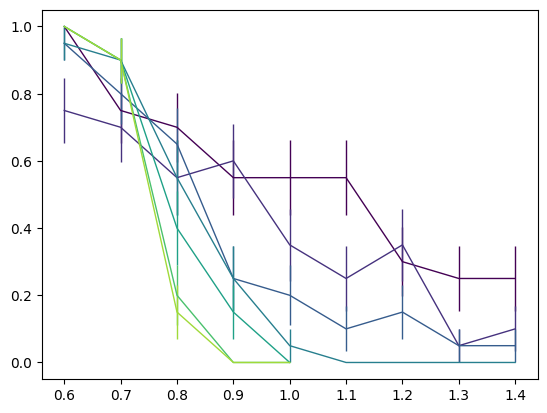

In [70]:
# plot capacity


success_rate = defaultdict(list)
experi = {}
# Create color map
cmap = plt.cm.viridis  # or any other colormap
N_values = [10, 20, 50, 100, 200, 500, 1000]
colors = {N: cmap(i / len(N_values)) for i, N in enumerate(N_values)}
for N in N_values:
    experi[N] = {}
    print("------------------------")
    if N < 200:
        min_N, max_N, step = int(N * 0.6), int(N * 1.4) + 1, int(N * 0.1)
    elif N < 500:
        min_N, max_N, step = int(N * 0.6), int(N * 1) + 1, int(N * 0.1)
    else:
        min_N, max_N, step = int(N * 0.6), int(N * 1) + 1, int(N * 0.1)
    for P in range(min_N, max_N, step):
        ave_success_rate, std_success_rate, exp = get_success_rate(
            num_samples=P, num_features=N
        )
        experi[N][P] = exp
        print("N = {}, P = {}, success rate = {}".format(N, P, ave_success_rate))

        success_rate[N].append((P, ave_success_rate, std_success_rate))
    with open("perceptron_sign_constrained_experi.pkl", "wb") as f:
        pickle.dump(experi, f)
    capacity = []
    sample = 100
    psedoC = []
    for i in range(sample):
        psedoX = []
        psedoY = []

        for P in experi[N]:
            psedoX += [P / N] * len(experi[N][P])
            psedoY += random.choices(experi[N][P], k=len(experi[N][P]))
        if min(psedoY) == max(psedoY):
            continue
        clf = LogisticRegression().fit(
            np.array(psedoX).reshape(-1, 1), np.array(psedoY)
        )
        newX = np.linspace(min(experi[N].keys()) / N, max(experi[N].keys()) / N, 20)
        if np.abs(-clf.intercept_[0] / clf.coef_[0][0]) > 20:
            continue
        psedoC.append(-clf.intercept_[0] / clf.coef_[0][0])

        probs = clf.predict_proba(newX.reshape(-1, 1))

        # plt.plot(
        #     newX,
        #     probs[:, 1],
        #     alpha=0.15,
        #     linewidth=0.5,
        #     color=colors[N],
        # )

    capacity.append([N, np.nanmean(np.array(psedoC)), np.nanstd(np.array(psedoC))])

    plt.errorbar(
        np.array(list(experi[N].keys())) / N,
        [np.mean(np.array(experi[N][P])) for P in experi[N]],
        yerr=[
            np.std(np.array(experi[N][P])) / np.sqrt(len(experi[N][P]))
            for P in experi[N]
        ],
        label="N=" + str(N),
        linewidth=1,
        color=colors[N],
    )
    print(capacity)
    with open("perceptron_sign_constrained_capacity.pkl", "wb") as f:
        pickle.dump(capacity, f)

    # plt.errorbar(
    #     [np.array(psedoC).mean()],
    #     [0.5],
    #     xerr=np.array(psedoC).std(),
    #     fmt="o",
    #     linewidth=2,
    #     capsize=2,
    #     color=colors[N],
    # )
print(success_rate)


In [1]:
with open("perceptron_sign_constrained_experi.pkl", "rb") as f:
    experi = pickle.load(f)
# Create color map
cmap = plt.cm.viridis  # or any other colormap
N_values = [10, 20, 50, 100, 200, 500, 1000]
colors = {N: cmap(i / len(N_values)) for i, N in enumerate(N_values)}
capacity = []
for N in N_values:
    sample = 5
    psedoC = []
    for i in range(sample):
        psedoX = []
        psedoY = []

        for P in experi[N]:
            psedoX += [P / N] * len(experi[N][P])
            psedoY += random.choices(experi[N][P], k=len(experi[N][P]))
        if min(psedoY) == max(psedoY):
            continue
        clf = LogisticRegression().fit(
            np.array(psedoX).reshape(-1, 1), np.array(psedoY)
        )
        newX = np.linspace(min(experi[N].keys()) / N, max(experi[N].keys()) / N, 20)
        if np.abs(-clf.intercept_[0] / clf.coef_[0][0]) > 20:
            continue
        psedoC.append(-clf.intercept_[0] / clf.coef_[0][0])

        probs = clf.predict_proba(newX.reshape(-1, 1))

        # plt.plot(
        #     newX,
        #     probs[:, 1],
        #     alpha=0.15,
        #     linewidth=0.5,
        #     color=colors[N],
        # )

    capacity.append([N, np.nanmean(np.array(psedoC)), np.nanstd(np.array(psedoC))])

    plt.errorbar(
        np.array(list(experi[N].keys())) / N,
        [np.mean(np.array(experi[N][P])) for P in experi[N]],
        yerr=[
            np.std(np.array(experi[N][P])) / np.sqrt(len(experi[N][P]))
            for P in experi[N]
        ],
        label="N=" + str(N),
        linewidth=1,
        color=colors[N],
    )

NameError: name 'pickle' is not defined

In [ ]:
capacity

defaultdict(list,
            {10: [(6, 0.8, 0.08944271909999159),
              (7, 0.85, 0.07984359711335655),
              (8, 0.7, 0.10246950765959596),
              (9, 0.65, 0.10665364503850772),
              (10, 0.5, 0.11180339887498948),
              (11, 0.4, 0.10954451150103323),
              (12, 0.3, 0.10246950765959596),
              (13, 0.4, 0.10954451150103323)],
             20: [(12, 0.8, 0.08944271909999159),
              (14, 0.85, 0.07984359711335655),
              (16, 0.75, 0.09682458365518541),
              (18, 0.45, 0.11124297730643495),
              (20, 0.35, 0.10665364503850769),
              (22, 0.2, 0.0894427190999916),
              (24, 0.05, 0.04873397172404481),
              (26, 0.05, 0.04873397172404481)],
             50: [(30, 0.95, 0.04873397172404482),
              (35, 0.85, 0.07984359711335655),
              (40, 0.45, 0.11124297730643495),
              (45, 0.55, 0.11124297730643493),
              (50, 0.05, 0.04873397172404